# Decision Tree


## 1.환경준비

### (1) import

In [2]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

## 2.데이터 준비

### (1) 데이터 정리

In [4]:
data.drop('EmployeeNumber', axis = 1, inplace = True)

### (2) 데이터분할1 : x, y 나누기

In [5]:
# x와 y 분리
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [6]:
cat_cols = ['Gender','JobSatisfaction','MaritalStatus','OverTime']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (5) 데이터분할2 : train : validation 나누기

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (6) Scaling

## 3.모델링

### (1) 필요한 함수 불러오기

* DecisionTree
    * DecisionTreeClassifier : 분류
    * DecisionTreeRegressor : 회귀

In [8]:
# 모델링을 위해
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 평가를 위해.
from sklearn.metrics import *

### (2) 선언

In [9]:
model = DecisionTreeClassifier() # Default로 만들면 가장 복잡한 Tree가 된다.

### (3) 모델링(학습)

In [10]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### (4) 검증 : 예측

In [11]:
tree_pred = model.predict(x_val)

### (5) 검증 : 평가

* confusion matrix

In [12]:
confusion_matrix(y_val, tree_pred)

array([[256,  44],
       [ 37,  22]], dtype=int64)

* classification report

In [13]:
print(classification_report(y_val, tree_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       300
           1       0.33      0.37      0.35        59

    accuracy                           0.77       359
   macro avg       0.60      0.61      0.61       359
weighted avg       0.78      0.77      0.78       359



## 4.Hyper Parameter

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

* max_depth : 트리의 깊이(크기를 결정)
* min_samples_leaf : leaf 노드의 최소 데이터 건수
    * leaf 노드는 y를 예측하는데 사용되는데, 데이터가 적으면 예측 결과에 대해 신뢰도가 떨어질 수 있다.


### (1) max_depth

In [14]:
# max_depth = 2
model1 = DecisionTreeClassifier(max_depth = 2)
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)
print(classification_report(y_val, pred1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       300
           1       0.47      0.31      0.37        59

    accuracy                           0.83       359
   macro avg       0.67      0.62      0.64       359
weighted avg       0.81      0.83      0.81       359



In [15]:
# max_depth = 5
model2 = DecisionTreeClassifier(max_depth = 5)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_val)
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       300
           1       0.44      0.27      0.34        59

    accuracy                           0.82       359
   macro avg       0.66      0.60      0.62       359
weighted avg       0.80      0.82      0.81       359



### (2) min_samples_leaf : 값이 작을수록 더 큰 트리를 만든다.

In [16]:
# min_samples_leaf = 30
model3 = DecisionTreeClassifier(min_samples_leaf = 30)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_val)
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       300
           1       0.52      0.22      0.31        59

    accuracy                           0.84       359
   macro avg       0.69      0.59      0.61       359
weighted avg       0.81      0.84      0.81       359



In [17]:
# min_samples_leaf = 60
model4 = DecisionTreeClassifier(min_samples_leaf = 60)
model4.fit(x_train, y_train)
pred4 = model4.predict(x_val)
print(classification_report(y_val, pred4))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       300
           1       0.47      0.31      0.37        59

    accuracy                           0.83       359
   macro avg       0.67      0.62      0.64       359
weighted avg       0.81      0.83      0.81       359



## 5.Decision Tree 내부 들여다 보기

### (1) 모델 시각화

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [18]:
y_train.head()

751    0
34     0
503    0
741    0
10     0
Name: Attrition, dtype: int64

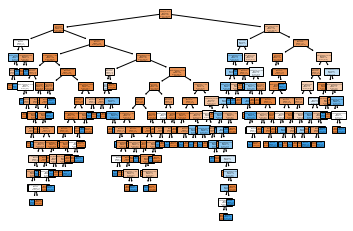

In [19]:
# 시각화
from sklearn.tree import plot_tree

# Decision Tree는 모델을 시각화 할 수 있습니다.
plot_tree(model,                                    #만든 모델 이름
               feature_names = list(x_train),     #Feature 이름, list(x_train)
               class_names = ['Stay', 'Leave'],      #Target(Class) 이름 
               filled = True);

#### 1) max_depth = 2

In [23]:
x_train.describe()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,36.876941,9.179211,6469.223417,15.256870,11.232975,0.614098,0.181601,0.274791,0.318996,0.476703,0.304659,0.296296
std,8.969667,8.154542,4603.025911,3.612474,7.673010,0.487099,0.385746,0.446676,0.466366,0.499756,0.460538,0.456896
min,18.000000,1.000000,1009.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2950.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,7.000000,4998.000000,14.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,14.000000,8381.000000,18.000000,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,29.000000,19999.000000,25.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
x_train.loc[x_train['OverTime_Yes'] <= 0.5]['OverTime_Yes'].count()

589

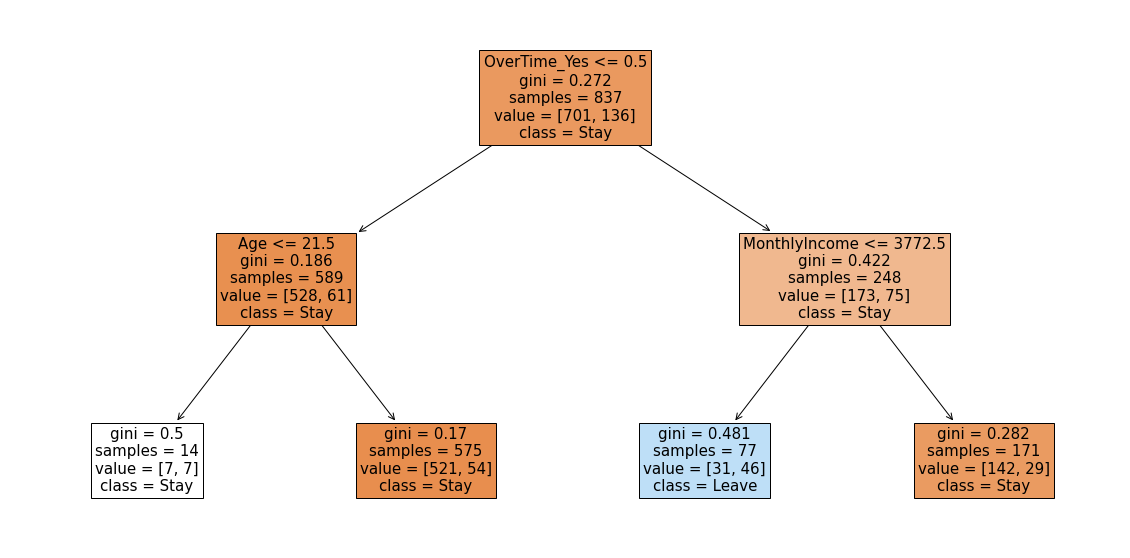

In [25]:
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model1, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 15);

#### 2) max_depth = 5

In [ ]:
plt.figure(figsize = (30,10)) # 그림 사이즈 조절
plot_tree(model2, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 8);

#### 3) min_samples_leaf = 30

In [ ]:
plt.figure(figsize = (30,15)) # 그림 사이즈 조절
plot_tree(model3, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 8);

#### 4) min_samples_leaf = 60

In [ ]:
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model4, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 10);

### (2) 변수 중요도

In [ ]:
# 변수 중요도
print(list(x_train))
print(model.feature_importances_)

* 변수중요도 그래프 그리기 함수 만들기

In [ ]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

In [ ]:
result = plot_feature_importance(model.feature_importances_, list(x_train))

In [ ]:
# MonthlyIncome이 제일 중요한데 왜 OverTime으로부터 분류를 시작한 것인가?
# 부모의 불순도를 가장 떨어뜨려주는 항목이 OverTime이었다.

In [ ]:
result

* 1~10까지 depth를 늘려가면서 성능측정(f1)

In [ ]:
depth = range(1,11)
f1 = []
for d in depth :
    m = DecisionTreeClassifier(max_depth = d)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append( f1_score(y_val, p) )

In [ ]:
plt.plot(depth, f1, marker = 's')
plt.grid()
plt.show()

실전에서는 방금 수행한 작업으로 for loop로 이용하기 보다는 Grid Search, Random Search 방식의 튜닝을 수행하게 됩니다.

## 6.실습 : 이동통신 가입 고객 이탈 예측

* 여러분은 OO 통신회사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 예측 모델링을 의뢰하였습니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)


### (1) 데이터 전처리

In [ ]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

* 변수정리 : 불필요한 변수를 정리합시다.
    * 식별자 : 일련번호, 주민번호, 전화번호, 고객ID, 사번 
    * 시계열 데이터 중 : 어떤 기간동안 거의 변화가 없는 값.(변동이 거의 없는) 값.


In [ ]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

* x, y 분할

In [ ]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화 

In [ ]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

* train, val 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.3)

### (2) 모델링
* max_depth를 1~10 사이에서 조정하며 모델을 생성하고 성능을 비교해 봅시다.
* min_samples_leaf 를 20 ~ 300 사이에서 조정하며 모델을 생성하고 성능을 비교해 봅시다.

In [ ]:
model1 = DecisionTreeClassifier(max_depth = 6)
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)

In [ ]:
model2 = DecisionTreeClassifier(min_samples_leaf = 70)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_val)

In [ ]:
model3 = DecisionTreeClassifier(min_samples_leaf = 100)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_val)

In [ ]:
model4 = DecisionTreeClassifier(min_samples_leaf = 250)
model4.fit(x_train, y_train)
pred4 = model4.predict(x_val)

### (3) 최적의 모델에 대해 시각화 및 변수 중요도를 살펴 봅시다.


In [ ]:
print(classification_report(y_val, pred1))
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model1, feature_names = list(x_train), 
               class_names= ['STAY', 'LEAVE'], filled = True, fontsize = 15)
plt.show()

In [ ]:
print(classification_report(y_val, pred2))
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model2, feature_names = list(x_train), 
               class_names= ['STAY', 'LEAVE'], filled = True, fontsize = 15)
plt.show()

In [ ]:
print(classification_report(y_val, pred3))
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model3, feature_names = list(x_train), 
               class_names= ['STAY', 'LEAVE'], filled = True, fontsize = 15)
plt.show()

In [ ]:
print(classification_report(y_val, pred4))
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model4, feature_names = list(x_train), 
               class_names= ['STAY', 'LEAVE'], filled = True, fontsize = 15)
plt.show()